# Import Dataset

In [14]:
import pandas as pd
import numpy as np
from nltk.corpus import stopwords
from textblob import Word
import re
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score
from sklearn.linear_model import SGDClassifier
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [15]:
data = pd.read_csv('text_emotion.csv')

# Preprocessing Dataset

In [16]:
# Drop the author Column as it's not useful
data = data.drop("author", axis=1)

# Dropping rows with other emotion labels
data = data.drop(data[data.sentiment == 'anger'].index)
data = data.drop(data[data.sentiment == 'boredom'].index)
data = data.drop(data[data.sentiment == 'enthusiasm'].index)
data = data.drop(data[data.sentiment == 'empty'].index)
data = data.drop(data[data.sentiment == 'fun'].index)
data = data.drop(data[data.sentiment == 'relief'].index)
data = data.drop(data[data.sentiment == 'surprise'].index)
data = data.drop(data[data.sentiment == 'love'].index)
data = data.drop(data[data.sentiment == 'hate'].index)
data = data.drop(data[data.sentiment == 'neutral'].index)
data = data.drop(data[data.sentiment == 'worry'].index)

# Making all letters lowercase
data['content'] = data['content'].apply(lambda x: " ".join(x.lower() for x in x.split()))

# Removing Punctuation, Symbols
data['content'] = data['content'].str.replace('[^\w\s]',' ')

# Removing Stop Words using NLTK
stop = stopwords.words('english')
data['content'] = data['content'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

# Lemmatisation
data['content'] = data['content'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))

#Correcting Letter Repetitions
def de_repeat(text):
    pattern = re.compile(r"(.)\1{2,}")
    return pattern.sub(r"\1\1", text)

data['content'] = data['content'].apply(lambda x: " ".join(de_repeat(x) for x in x.split()))

# Code to find the top 10,000 rarest words appearing in the data
freq = pd.Series(' '.join(data['content']).split()).value_counts()[-10000:]

# Removing all those rarely appearing words from the data
freq = list(freq.index)
data['content'] = data['content'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))

# Encoding output labels 'sadness' as '1' & 'happiness' as '0'
lbl_enc = preprocessing.LabelEncoder()
y = lbl_enc.fit_transform(data.sentiment.values)

<input>:21: DeprecationWarning: invalid escape sequence \w
<input>:21: DeprecationWarning: invalid escape sequence \w
<input>:21: DeprecationWarning: invalid escape sequence \w
<input>:21: DeprecationWarning: invalid escape sequence \w
<input>:21: DeprecationWarning: invalid escape sequence \w
<input>:21: DeprecationWarning: invalid escape sequence \w
<input>:21: DeprecationWarning: invalid escape sequence \w
<input>:21: DeprecationWarning: invalid escape sequence \w
<input>:21: DeprecationWarning: invalid escape sequence \w
<input>:21: DeprecationWarning: invalid escape sequence \w
<input>:21: DeprecationWarning: invalid escape sequence \w
<input>:21: DeprecationWarning: invalid escape sequence \w
<input>:21: DeprecationWarning: invalid escape sequence \w
<input>:21: DeprecationWarning: invalid escape sequence \w
<input>:21: DeprecationWarning: invalid escape sequence \w
<input>:21: DeprecationWarning: invalid escape sequence \w
<input>:21: DeprecationWarning: invalid escape sequence 

# Dataset

In [17]:
# Splitting into training and testing data in 90:10 ratio
X_train, X_val, y_train, y_val = train_test_split(data.content.values, y, stratify=y, random_state=42, test_size=0.1, shuffle=True)

# Extracting Count Vectors Parameters
count_vect = CountVectorizer(analyzer='word')
count_vect.fit(data['content'])
X_train_count =  count_vect.transform(X_train)
X_val_count =  count_vect.transform(X_val)

# Modeling & Training

In [18]:
# Model : Linear SVM
lsvm = SGDClassifier(alpha=0.001, random_state=5, max_iter=15, tol=None)

# Train
lsvm.fit(X_train_count, y_train)

# Prediction
y_pred = lsvm.predict(X_val_count)

In [19]:
# Find the Accuracy of the Training Model
Temp = accuracy_score(y_pred, y_val)
Accuracy = str(Temp)
print('LSVM with Count Vectors accuracy result : ' + Accuracy)

LSVM with Count Vectors accuracy result : 0.7842003853564548


# Take Youtube Subtitle

In [20]:
!pip install pytube
from pytube import YouTube
import requests
import re

In [ ]:
def urlify(s):
  s = re.sub(r"[^\w\s]", '', s)
  s = re.sub(r"\s+", '-', s)
  return s

vids = r'https://www.youtube.com/watch?v=mx3krJHlUzc'
source = YouTube(vids)

spaces = 0
source = YouTube(vids)
en_caption = source.captions.get_by_language_code('a.en')
en_caption_convert_to_srt = en_caption.generate_srt_captions()

filename = source.title
filename = urlify(filename)
filename = filename + ".txt"

# save the caption to a file named Output.txt
text_file = open(filename, "w")
text_file.write(en_caption_convert_to_srt)
text_file.close()

file = open(filename, "r")
lines = file.readlines()
file.close()

text = ''
for line in lines:
    if re.search('^[0-9]+$', line) is None and re.search('^[0-9]{2}:[0-9]{2}:[0-9]{2}', line) is None and re.search('^$', line) is None and re.search('^\[.*]$', line) is None:
        spaces = 0
        text += ' ' + line.rstrip('\n')

    text = text.lstrip()
    spaces = spaces + 1
    if re.search('^\[.*]$', line):
        spaces = 0
    if spaces == 4:
        text = text + ';'
text_file = open(filename, "w")
text_file.write(text)
text_file.close()

In [22]:
# Read the text file and seperate each sentence with ";" symbol 
# Untuk bagian ini kami belum membuat pengambilan data secara langsung melainkan menginput nama filenya karena masih dalam bentuk prototype
subtitle = pd.read_csv('2021-Tech-Im-Ready-For.txt', sep = ";", header = None)

# Transpose the matrix from column to row and row to column
subtitle = subtitle.T

# Preprocessing Youtube Subtitle

In [ ]:
# Drop all "NULL" data from the dataset
subtitles = subtitle.dropna()

# Doing some preprocessing on the subtitles
subtitles[0] = subtitles[0].str.replace('[^\w\s]',' ')
stop = stopwords.words('english')
subtitles[0] = subtitles[0].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
subtitles[0] = subtitles[0].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))

# Extracting Count Vectors feature from the subtitles
subtitle_count = count_vect.transform(subtitles[0])

# Predicting the emotion of the subtitle using trained linear SVM

In [24]:
# Predicting the emotion of the subtitle using trained linear SVM
subtitle_pred = lsvm.predict(subtitle_count)
print(subtitle_pred)

[1 0 1 0 0 0 1 0 0 1 1 0 1 0 0 0 1 0 1 1 0 0 0 0 0 1 0 0 0 0 1 1 1 1 1 0 1
 0 1 1 0 1 1 0 0 0 1 0 0 0 1 1 1 0 1 1 1 0 0 1 0 1 1 1 1 1 1 0 0 0 1 1 1 0
 1 0 0 1 1 1 1 1 1 1 0 0 1 0 0 1 0 0 0 0 0 0 1 1 1 1 0 1 1 1 1 1 1 1 0 1 0
 1 0 0 1 1 1 0 1 1 0 0 0 0 1 0 1 0 1 1 1 1 1 0 1 0 0 1 1 1 1 1 0 1 1 0 1 1
 0 1 1 1 0 0 0 1 1 1 1 0 1 1 0 0 1 1 1 1 0 1 1 1 1 1 0 1 1 0 0 0 1 1 0 0 0
 1 0 1 1 0 1 0 0 1 1 0 0 1 1 0 0 0 1 0 0 0 1 0 1 1 0 0 1 0 1 1 0 1 0 0 0 1
 0 0 1 1 1 1 0 0 0 0 1 0 0 1 0 1 0 1 0 1 0 1 1 1 1 1 1 0 0 0 1 1 0 1 0 0 0
 0 1 1 1 1 1 0 0 0 1 0 0 0 1 1 1 0 1 1 1 1 0 0 1 1 1 0 0 1 0 0 1 1 0 0 0 0
 1 1 0 1 0 1 1 1 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 1 1 0 0
 0 0 1 1 1 1 0 1 0 0 1 1 0 0 1 1 1 0 1 1 0 1 0 0 0 0 1 1 0 1 1 0 1 1 1 0 1
 1 0 0 0 1 1 0 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 1 1 1 1 1 1 0 0 1 0 1 0 0 1 0
 1 0 1 1 1 0 0 0 0 1 1 0 1 0 0 0 0 1 1 1 1 0 1 0 0 1 0 0 1 1 1 1 1 0 0 0 0
 0 0 1 1 0 0 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 1
 0 0 1 1 0 0 1 1 1 0 1 0 

In [25]:
# Count all the happiness and sadness number from "subtitle_pred"
happinessCount = np.count_nonzero(subtitle_pred == 0)
sadnessCount = np.count_nonzero(subtitle_pred == 1)

# Get the percentage for both happiness and sadness
happinessPercent = happinessCount / (happinessCount + sadnessCount) * 100
sadnessPercent = sadnessCount / (happinessCount + sadnessCount) * 100

# Make the percentage into a string for printing
hpPercentage = str(happinessPercent)
sdPercentage = str(sadnessPercent)

# Print both happiness and sadness results
print("Happiness Percent = " + hpPercentage + "%")
print("Sadness Percent = " + sdPercentage + "%")

Happiness Percent = 48.263254113345525%
Sadness Percent = 51.736745886654475%


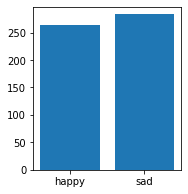

In [26]:
import matplotlib.pyplot as plt

names = ['happy', 'sad']
values = [happinessCount, sadnessCount]

plt.figure(figsize=(9, 3))

plt.subplot(131)
plt.bar(names, values)
plt.show()